# Statistical Problems: Step 1

## Question 1
#### What are the columns and what do they mean?
```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```

## Importing data file

In [1]:
import numpy as np
import pandas as pd

titanic_data = pd.read_csv('train.csv')
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### How big is the data?

In [2]:
print("There are " + str(len(titanic_data)) + " rows in out dataset. \n")
print("The column names are " + str(list(titanic_data.columns.values)))

There are 891 rows in out dataset. 

The column names are ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


## Question 2
#### What's the average age of..
    - any Titanic passenger
    - a survivor
    - a non-surviving first-class passenger
    - male survivors older than 30 from anywhere but Queenstown

In [3]:
Ages = np.mean(titanic_data.Age)
print('Average age of all passengers with data is {}'.format(Ages))

Average age of all passengers with data is 29.69911764705882


In [4]:
survivors = titanic_data[titanic_data.Survived == 1]

In [5]:
srv_ages = np.mean(survivors.Age)
print('Average survivor age is {}'.format(srv_ages))

Average survivor age is 28.343689655172415


In [6]:
first_dead = titanic_data[(titanic_data.Survived == 0) & (titanic_data.Pclass ==1)]
first_dead_ages = np.mean(first_dead.Age)
print('Average first class passenger who died age is {}'.format(first_dead_ages))

Average first class passenger who died age is 43.6953125


In [7]:
live_males = titanic_data[(titanic_data.Survived==1) & (titanic_data.Age>30) & (titanic_data.Sex=='male') & (titanic_data.Embarked!= 'Q')]
live_males_ave = np.mean(live_males.Age)
print('Average age of male not dead over 30 not from Queenstown is {}'.format(live_males_ave))

Average age of male not dead over 30 not from Queenstown is 41.48780487804878


## Question 3
#### What's the most common..
    - passenger class
    - port of Embarkation
    - number of siblings or spouses aboard for surviors

In [8]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

The most common passengers are in the third class.

In [9]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The most common port to embark from is Southamptom.

In [10]:
survivors['SibSp'].value_counts()

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

More often survivors had 0 sibliings or spouses onboards.

## Question 4
#### Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Above or below the mean?

In [11]:
fare_mean = np.mean(titanic_data.Fare)
print("The average fare prices is: " + str(fare_mean))

The average fare prices is: 32.2042079685746


In [12]:
fare_median = np.median(titanic_data.Fare)
print("The median fare prices is: " + str(fare_median))

The median fare prices is: 14.4542


In [13]:
std_all = np.std(titanic_data.Fare)
print("The standard deviation of the fare prices is: " + str(std_all))

The standard deviation of the fare prices is: 49.66553444477411


In [14]:
max = (fare_mean + std_all)
min = (fare_mean - std_all)
print("Anything within the " + str(min) + " and " + str(max) + " is within one standard deviation of the mean.")

Anything within the -17.46132647619951 and 81.86974241334872 is within one standard deviation of the mean.


Because the median (14.4542) is between -17.46132647619951 and 81.86974241334872, we can conclude that it is in fact with one standard deviation of the mean.

## Question 5
#### How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?

In [15]:
p90, p5 = np.percentile(titanic_data.Fare, [90,5])
diff = p90 - p5
print("The 5th percentile: " + str(p5)) 
print("The 90th percentile: " + str(p90)) 
print('The difference between the 90th and 5th percentile in ticket cost is ${}'.format(diff))

The 5th percentile: 7.225
The 90th percentile: 77.9583
The difference between the 90th and 5th percentile in ticket cost is $70.7333


In [16]:
class_90 = titanic_data[titanic_data.Fare == p90].Pclass
print("Tickets at the 90th percentile are associated with passengers in class: " + str(class_90.values[1]))

Tickets at the 90th percentile are associated with passengers in class: 1


In [17]:
class_5 = titanic_data[titanic_data.Fare == p5].Pclass
print("Tickets at the 90th percentile are associated with passengers in class: " + str(class_5.values[1]))

Tickets at the 90th percentile are associated with passengers in class: 3


##  Question 6
#### Which port has the heightest average ticket price paid by passengers? 

In [18]:
s_average = np.mean(titanic_data.Fare[titanic_data.Embarked=='S'])
print("South Hampton passengers paid an average of: $" + str(s_average))

South Hampton passengers paid an average of: $27.07981180124218


In [19]:
q_average = np.mean(titanic_data.Fare[titanic_data.Embarked=='Q'])
print("Queenstown passengers paid an average of: $" + str(q_average))

Queenstown passengers paid an average of: $13.276029870129872


In [20]:
c_average = np.mean(titanic_data.Fare[titanic_data.Embarked=='C'])
print("Cherbourg passengers paid an average of: $" + str(c_average))

Cherbourg passengers paid an average of: $59.95414404761905


#### Cherbourg is the port with the highest price average.


## Question 7
#### Which port has passengers from the most similar passenger class?

In [21]:
s_class_ave = titanic_data[titanic_data.Embarked=='S'].Pclass
import scipy.stats as sp
s_class_ave = sp.mode(s_class_ave)
print("Passengers from Southampton are mostly from class " + str(s_class_ave[0][0]) + " with a count of " + str(s_class_ave[1][0]))

Passengers from Southampton are mostly from class 3 with a count of 353


In [22]:
q_class_ave = titanic_data[titanic_data.Embarked=='Q'].Pclass
q_class_ave = sp.mode(q_class_ave)
print("Passengers from Queenstown are mostly from class " + str(q_class_ave[0][0]) + " with a count of " + str(q_class_ave[1][0]))

Passengers from Queenstown are mostly from class 3 with a count of 72


In [23]:
c_class_ave = titanic_data[titanic_data.Embarked=='C'].Pclass
c_class_ave = sp.mode(c_class_ave)
print("Passengers from Cherbourg are mostly from class " + str(c_class_ave[0][0]) + " with a count of " + str(c_class_ave[1][0]))

Passengers from Cherbourg are mostly from class 1 with a count of 85


##### Southampton has the most passangers from the same class which is third at a count of 353.

## Question 8
#### How many male survivors in first class paid lower then the overall median ticket price?

In [24]:
male_over_median = titanic_data[(titanic_data.Fare < fare_median) & (titanic_data.Pclass == 1) & (titanic_data.Survived == 1) & (titanic_data.Sex == "male")]
print("First-class male surviors that paid less then the median: " + str(male_over_median.values))

First-class male surviors that paid less then the median: []


##### NO first-class male survivors paid less the the median.

## Question 9
How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?

In [25]:
surv_fam = np.mean(survivors[(survivors.SibSp > 0)|(survivors.Parch > 0)].Age)
print("Average age of surviving passengers with any sort of family members: " + str(surv_fam) + "\n")

dead_fam = np.mean(titanic_data[(titanic_data.Survived == 0) & (titanic_data.SibSp == 0) & (titanic_data.Parch==0)].Age)
print("Average age of dead passengers without any sort of family members: " + str(dead_fam) + "\n")

print("Age difference between surviving passengers w/ family members vs dead passengers w/o family members: " + str(surv_fam - dead_fam))

Average age of surviving passengers with any sort of family members: 25.526062500000002

Average age of dead passengers without any sort of family members: 32.41423357664234

Age difference between surviving passengers w/ family members vs dead passengers w/o family members: -6.888171076642337


#### The surviving passegners with family were 6.888 years younger then the dead without.   See above for exact number.

## Question 10
Display the relationship between survival rate and the quantile of the ticket price for 20 integer quantiles. 

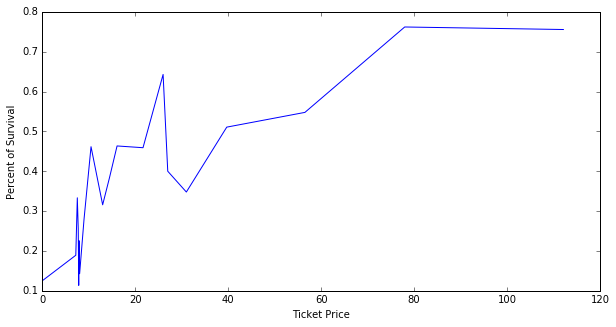

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
quant_list = []
surv_percents = []
for i in range(20):
    i_per, iplus_per = np.percentile(titanic_data.Fare, [i*5, (i+1)*5])
    total = np.sum((titanic_data.Fare > i_per) & (titanic_data.Fare <= iplus_per))
    cut = (titanic_data.Fare > i_per) & (titanic_data.Fare <= iplus_per)
    surv = cut & (titanic_data.Survived==1)
    surv_percents.append(np.sum(surv)/total)
    quant_list.append(i_per)

plt.figure(figsize=(10, 5))
plt.plot(quant_list, surv_percents)
plt.xlabel("Ticket Price")
plt.ylabel("Percent of Survival")
plt.show()